In [1]:
import neuralnetwork
from neuralnetwork import FFNN 
from neuralnetwork import Sigmoid
from neuralnetwork import MSE
from neuralnetwork import Adam
from neuralnetwork import Activations
from neuralnetwork import Constant
from neuralnetwork import RMS_prop
from neuralnetwork import RELU
from neuralnetwork import LRELU
import math
import autograd.numpy as np
import sys
import warnings
from autograd import grad, elementwise_grad
from random import random, seed
from copy import deepcopy, copy
from typing import Tuple, Callable
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


Have already tested a lot for the Sigmoid in the plots task b so now I will focus on RELU and LRELU

In [ ]:
#Create Runge dataset

#Setting up the input to use on the neural network script imported, using Runges Function

#Importing packages
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

#Random seed to keep the results consistent 
np.random.seed(2030)

def Runge():
    n = 500
    x = np.linspace(-1,1,n).reshape(-1,1) #interval between -1 and 1 formatted to fit in shape with the neural network
    denominator = 1 + (25*x**2) 
    y = 1 / denominator #will not add noise right now
    return x, y  

x, y = Runge()

#Setting up the design matrix is not necessary since we are using the neural network 
#But we still need to do some scaling
Xtrain, Xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)
#Scale data 
Scaling = StandardScaler(with_std = True)
Scaling.fit(Xtrain)
Xtrain = Scaling.transform(Xtrain)
Xtest = Scaling.transform(Xtest)
ymin, ymax = ytrain.min(), ytrain.max()
ytrain = (ytrain - ymin) / (ymax - ymin)
ytest = (ytest - ymin) / (ymax - ymin)

In [3]:
results_learning_rates_RELU = []
for layers, label in [
    ((1,50,1), '1 Hidden Layer'),
    ((1,50,100,1), '2 Hidden Layers')
    ]:

    for lr in [0.01, 0.001, 0.0065, 0.0001]:
        optimizer = [
            Adam(eta=lr, rho = 0.9, rho2=0.999), #vals chosen based on Geeks for Geeks source on Adam optimization
            RMS_prop(eta=lr, rho = 0.9),
            Constant(eta = lr)
        ]

        for o in optimizer:
            nn = FFNN(
                nodes = layers,
                hidden_activation= RELU(),
                output_activation= lambda x: x, 
                cost_func = MSE()
            )

            res = nn.fit(
                X = Xtrain, 
                t = ytrain,
                scheduler = o, 
                batches = 4, 
                epochs = 2000, 
                lam = 0.01
            )

            ypred = nn.predict(Xtest)
            test_error = np.mean(ytest - ypred)**2 #MSE
            results_learning_rates_RELU.append({
                'layers': label,
                'lr': lr,
                'optimizer': o.__class__.__name__,
                'Test error': test_error,
                'Train error': res['train_errors'][-1]
            })


Adam: Eta=0.01, Lambda=0.01
  [=======================================>] 100.0% | train_error: 1.22   RMS_prop: Eta=0.01, Lambda=0.01
  [=======================================>] 100.0% | train_error: 1.00   Constant: Eta=0.01, Lambda=0.01
  [=======================================>] 100.0% | train_error: 0.594  Adam: Eta=0.001, Lambda=0.01
  [=======================================>] 100.0% | train_error: 0.990  RMS_prop: Eta=0.001, Lambda=0.01
  [=======================================>] 100.0% | train_error: 0.988  Constant: Eta=0.001, Lambda=0.01
  [=======================================>] 100.0% | train_error: 0.755  Adam: Eta=0.0065, Lambda=0.01
  [=======================================>] 100.0% | train_error: 1.12   RMS_prop: Eta=0.0065, Lambda=0.01
  [=======================================>] 100.0% | train_error: 1.00   Constant: Eta=0.0065, Lambda=0.01
  [=======================================>] 100.0% | train_error: 0.944  Adam: Eta=0.0001, Lambda=0.01
  [================

In [10]:
#general func for plotting heatmaps - use for task D
def heatmap_gen(results, plotting_val, xlabel, title):
    df_learning = pd.DataFrame(results)
    layer = df_learning['layers'].unique() #to avvoid duplicate labels
    fig, axes = plt.subplots(1,2, figsize = (12,5))

    for ax, l in zip(axes, layer):
        pivot_pre = df_learning[df_learning['layers'] == l]
    
        pivot = pivot_pre.pivot(index = 'optimizer', columns = 'lr', values = f'{plotting_val}')
        sns.heatmap(pivot, annot = True, cmap = 'rocket_r', fmt = '.3f', ax = ax, center = 0)
        ax.set_title(f'{title} for {l}')
        ax.set_xlabel(xlabel)
        ax.set_ylabel('Optimizers')
    
    plt.tight_layout()
    plt.show()
    return pivot



In [5]:
results_learning_rates_LRELU = []
for layers, label in [
    ((1,50,1), '1 Hidden Layer'),
    ((1,50,100,1), '2 Hidden Layers')
    ]:

    for lr in [0.01, 0.001, 0.0065, 0.0001]:
        optimizer = [
            Adam(eta=lr, rho = 0.9, rho2=0.999), #vals chosen based on Geeks for Geeks source on Adam optimization
            RMS_prop(eta=lr, rho = 0.9),
            Constant(eta = lr)
        ]

        for o in optimizer:
            nn = FFNN(
                nodes = layers,
                hidden_activation= LRELU(),
                output_activation= lambda x: x, 
                cost_func = MSE()
            )

            res = nn.fit(
                X = Xtrain, 
                t = ytrain,
                scheduler = o, 
                batches = 4, 
                epochs = 2000, 
                lam = 0.01
            )

            ypred = nn.predict(Xtest)
            test_error = np.mean(ytest - ypred)**2 #MSE
            results_learning_rates_LRELU.append({
                'layers': label,
                'lr': lr,
                'optimizer': o.__class__.__name__,
                'Test error': test_error,
                'Train error': res['train_errors'][-1]
            })


Adam: Eta=0.01, Lambda=0.01
  [=======================================>] 100.0% | train_error: 0.727  RMS_prop: Eta=0.01, Lambda=0.01
  [=======================================>] 100.0% | train_error: 1.00   Constant: Eta=0.01, Lambda=0.01
  [=======================================>] 100.0% | train_error: 0.594  Adam: Eta=0.001, Lambda=0.01
  [=======================================>] 100.0% | train_error: 0.990  RMS_prop: Eta=0.001, Lambda=0.01
  [=======================================>] 100.0% | train_error: 0.988  Constant: Eta=0.001, Lambda=0.01
  [=======================================>] 100.0% | train_error: 0.755  Adam: Eta=0.0065, Lambda=0.01
  [=======================================>] 100.0% | train_error: 0.999  RMS_prop: Eta=0.0065, Lambda=0.01
  [=======================================>] 100.0% | train_error: 1.00   Constant: Eta=0.0065, Lambda=0.01
  [=======================================>] 100.0% | train_error: 0.944  Adam: Eta=0.0001, Lambda=0.01
  [================

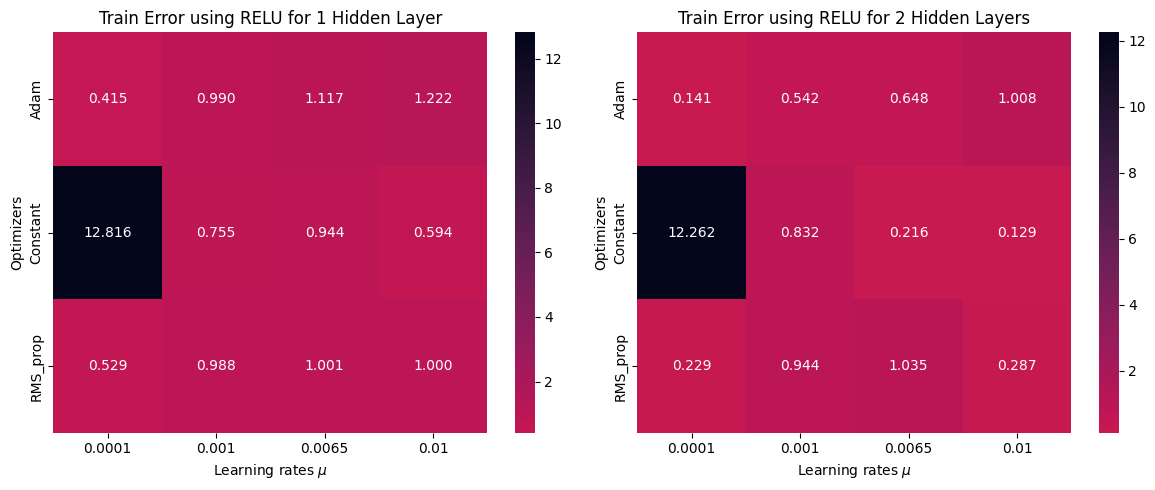

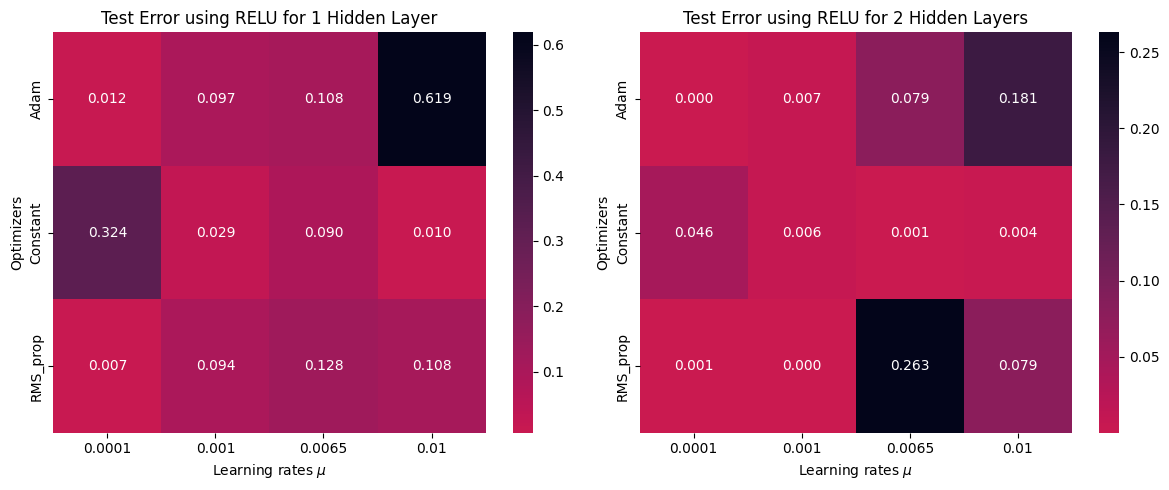

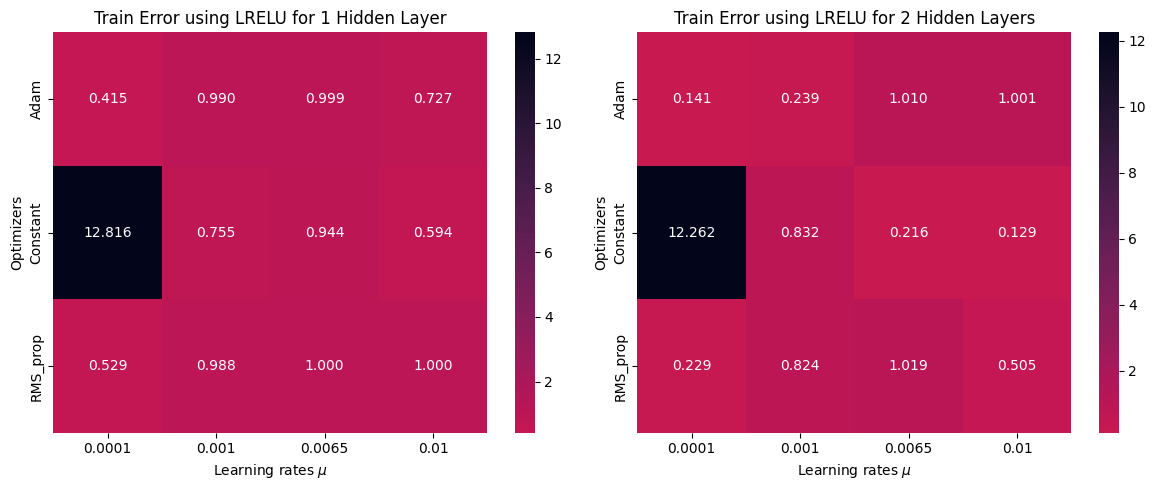

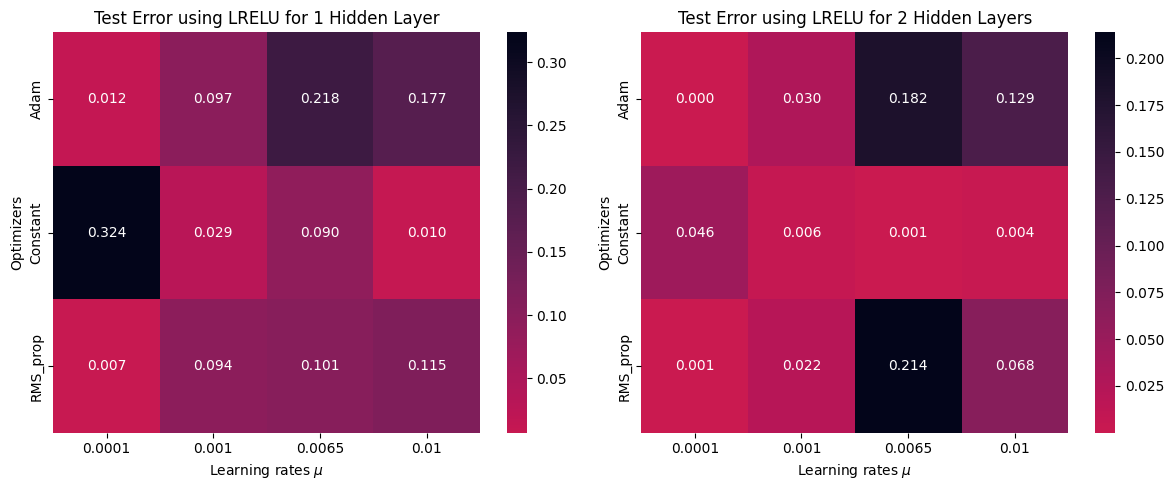

lr,0.0001,0.0010,0.0065,0.0100
optimizer,,,,
Adam,0.000022,0.030066,0.181634,0.129071
Constant,0.045960,0.006195,0.000955,0.003940
RMS_prop,0.001410,0.021575,0.213845,0.067975


In [ ]:

xlabel_str = fr'Learning rates $\mu$'
heatmap_gen(results_learning_rates_RELU, 'Train error', xlabel_str, f'Train Error using RELU')
heatmap_gen(results_learning_rates_RELU, 'Test error', xlabel_str, f'Test Error using RELU')
heatmap_gen(results_learning_rates_LRELU, 'Train error', xlabel_str, f'Train Error using LRELU')
heatmap_gen(results_learning_rates_LRELU, 'Test error', xlabel_str, f'Test Error using LRELU')

In [5]:
#RELU
results_epochs_RELU = []
for layers, label in [
    ((1,50,1), '1 Hidden Layer'),
    ((1,50,100,1), '2 Hidden Layers')
    ]:

    for e in [500,1000,2000,3000,4000,5000,6000,7000, 8000,9000, 10000]:
        optimizer = [
            Adam(eta=0.0001, rho = 0.9, rho2=0.999), #vals chosen based on Geeks for Geeks source on Adam optimization
            RMS_prop(eta=0.0001, rho = 0.9),
            Constant(eta = 0.0001)
        ]

        for o in optimizer:
            nn = FFNN(
                nodes = layers,
                hidden_activation= RELU(),
                output_activation= lambda x: x, 
                cost_func = MSE()
            )

            res = nn.fit(
                X = Xtrain, 
                t = ytrain,
                scheduler = o, 
                batches = 4, 
                epochs = e, 
                lam = 0.01
            )

            ypred = nn.predict(Xtest)
            test_error = np.mean(ytest - ypred)**2 #MSE but without 1/n to see how it evolves
            results_epochs_RELU.append({
                'layers': label,
                'epochs': e, 
                'optimizer': o.__class__.__name__,
                'Train Error': res['train_errors'][-1],
                'Test Error' : test_error
            })


Adam: Eta=0.0001, Lambda=0.01
  [=======================================>] 100.0% | train_error: 2.22  RMS_prop: Eta=0.0001, Lambda=0.01
  [=======================================>] 100.0% | train_error: 1.91  Constant: Eta=0.0001, Lambda=0.01
  [=======================================>] 100.0% | train_error: 19.9  Adam: Eta=0.0001, Lambda=0.01
  [=======================================>] 100.0% | train_error: 1.56  RMS_prop: Eta=0.0001, Lambda=0.01
  [=======================================>] 100.0% | train_error: 2.01  Constant: Eta=0.0001, Lambda=0.01
  [=======================================>] 100.0% | train_error: 17.9  Adam: Eta=0.0001, Lambda=0.01
  [=======================================>] 100.0% | train_error: 0.415  RMS_prop: Eta=0.0001, Lambda=0.01
  [=======================================>] 100.0% | train_error: 0.529  Constant: Eta=0.0001, Lambda=0.01
  [=======================================>] 100.0% | train_error: 12.8   Adam: Eta=0.0001, Lambda=0.01
  [=============

In [12]:
def line_epochs_plot(results):
    df_epochs = pd.DataFrame(results)

    for l in df_epochs['layers'].unique():
        pivot_train = df_epochs[df_epochs['layers'] == l].pivot(index = 'epochs', columns = 'optimizer', values = 'Train Error')
        print(pivot_train)
        pivot_test = df_epochs[df_epochs['layers'] == l].pivot(index = 'epochs', columns = 'optimizer', values = 'Test Error')
        print(pivot_train)

    #Making the plots
    x = np.array([500,1000,2000,3000,4000,5000,6000,7000, 8000,9000, 10000]) 
    fig, ax = plt.subplots(1,2, figsize = (15,8))
    ax[0].plot(x, pivot_train.Adam, color = 'm', label = 'Adam')
    ax[0].scatter(x, pivot_train.Adam, color = 'darkmagenta')
    ax[0].plot(x, pivot_train.RMS_prop, color = 'dodgerblue', label = 'RMS prop')
    ax[0].plot(x, pivot_train.Constant, color = 'firebrick', label = 'Constant')
    ax[0].scatter(x, pivot_train.RMS_prop, color = 'navy')
    ax[0].scatter(x, pivot_train.Constant, color = 'maroon')
    ax[0].set_title('Training errors')
    ax[1].plot(x, pivot_test.Adam, color = 'm', label = 'Adam')
    ax[1].scatter(x, pivot_test.Adam, color = 'darkmagenta')
    ax[1].plot(x, pivot_test.RMS_prop , color = 'dodgerblue', label = 'RMS prop')
    ax[1].plot(x, pivot_test.Constant , color = 'firebrick', label = 'Constant')
    ax[1].scatter(x, pivot_test.RMS_prop, color = 'navy')
    ax[1].scatter(x, pivot_test.Constant , color = 'maroon')
    ax[1].set_title('Test errors')
    for axes in ax:
        axes.set_xlabel('Epochs')
        axes.set_ylabel('Error')
        axes.legend()
        axes.grid(True)
    plt.show()

optimizer      Adam   Constant  RMS_prop
epochs                                  
500        2.215743  19.897678  1.905976
1000       1.556095  17.905556  2.013686
2000       0.414772  12.816340  0.529028
3000       0.576139   7.985519  0.428480
4000       0.782246   5.092227  0.507889
5000       0.879135   3.573935  0.606883
6000       0.975379   3.255471  0.659772
7000       0.981172   3.022525  0.734837
8000       0.978618   2.505958  0.757744
9000       0.978163   1.731769  0.807073
10000      0.983414   1.395222  0.902185
optimizer      Adam   Constant  RMS_prop
epochs                                  
500        2.215743  19.897678  1.905976
1000       1.556095  17.905556  2.013686
2000       0.414772  12.816340  0.529028
3000       0.576139   7.985519  0.428480
4000       0.782246   5.092227  0.507889
5000       0.879135   3.573935  0.606883
6000       0.975379   3.255471  0.659772
7000       0.981172   3.022525  0.734837
8000       0.978618   2.505958  0.757744
9000       0.978

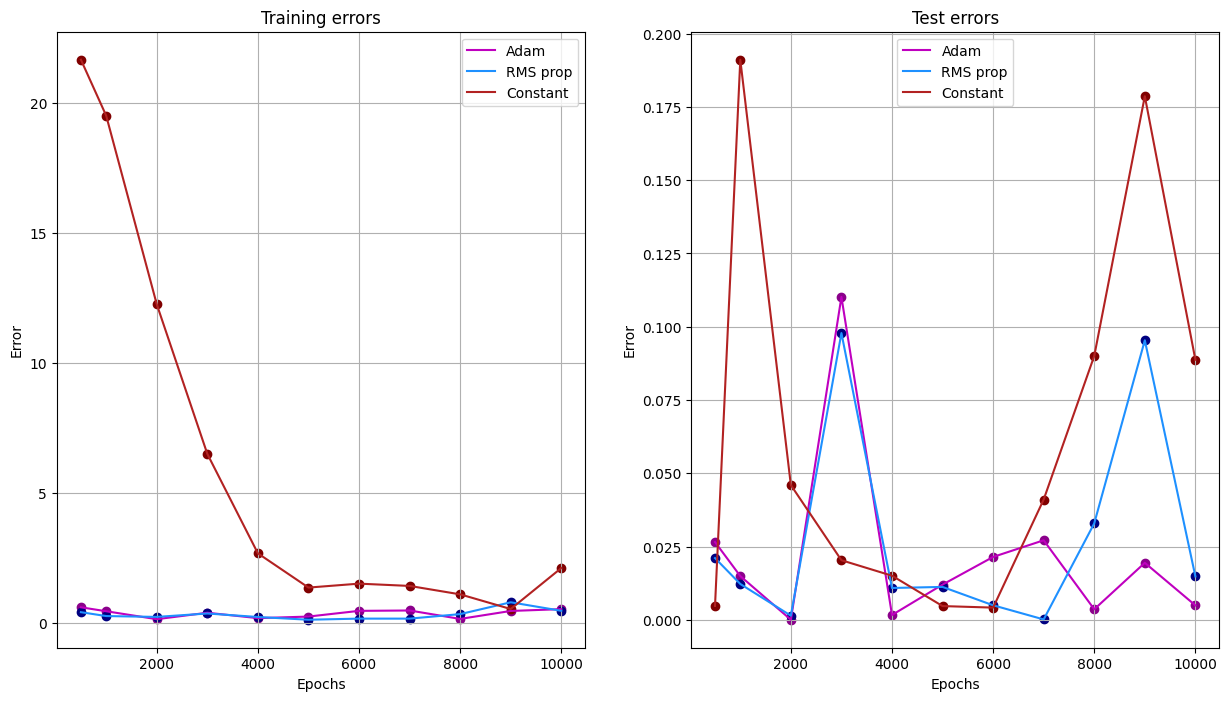

In [13]:
line_epochs_plot(results_epochs_RELU)

In [6]:
results_epochs_LRELU = []
for layers, label in [
    ((1,50,1), '1 Hidden Layer'),
    ((1,50,100,1), '2 Hidden Layers')
    ]:

    for e in [500,1000,2000,3000,4000,5000,6000,7000, 8000,9000, 10000]:
        optimizer = [
            Adam(eta=0.0001, rho = 0.9, rho2=0.999), #vals chosen based on Geeks for Geeks source on Adam optimization
            RMS_prop(eta=0.0001, rho = 0.9),
            Constant(eta = 0.0001)
        ]

        for o in optimizer:
            nn = FFNN(
                nodes = layers,
                hidden_activation= LRELU(),
                output_activation= lambda x: x, 
                cost_func = MSE()
            )

            res = nn.fit(
                X = Xtrain, 
                t = ytrain,
                scheduler = o, 
                batches = 4, 
                epochs = e, 
                lam = 0.01
            )

            ypred = nn.predict(Xtest)
            test_error = np.mean(ytest - ypred)**2 #MSE but without 1/n to see how it evolves
            results_epochs_LRELU.append({
                'layers': label,
                'epochs': e, 
                'optimizer': o.__class__.__name__,
                'Train Error': res['train_errors'][-1],
                'Test Error' : test_error
            })

Adam: Eta=0.0001, Lambda=0.01
  [=======================================>] 100.0% | train_error: 2.22  RMS_prop: Eta=0.0001, Lambda=0.01
  [=======================================>] 100.0% | train_error: 1.91  Constant: Eta=0.0001, Lambda=0.01
  [=======================================>] 100.0% | train_error: 19.9  Adam: Eta=0.0001, Lambda=0.01
  [=======================================>] 100.0% | train_error: 1.56  RMS_prop: Eta=0.0001, Lambda=0.01
  [=======================================>] 100.0% | train_error: 2.01  Constant: Eta=0.0001, Lambda=0.01
  [=======================================>] 100.0% | train_error: 17.9  Adam: Eta=0.0001, Lambda=0.01
  [=======================================>] 100.0% | train_error: 0.415  RMS_prop: Eta=0.0001, Lambda=0.01
  [=======================================>] 100.0% | train_error: 0.529  Constant: Eta=0.0001, Lambda=0.01
  [=======================================>] 100.0% | train_error: 12.8   Adam: Eta=0.0001, Lambda=0.01
  [=============

optimizer      Adam   Constant  RMS_prop
epochs                                  
500        2.215743  19.897678  1.905976
1000       1.556095  17.905556  2.013686
2000       0.414772  12.816340  0.529028
3000       0.576139   7.985519  0.428480
4000       0.782246   5.092227  0.507889
5000       0.879135   3.573935  0.588449
6000       0.975379   3.255471  0.664071
7000       0.981172   3.022525  0.709501
8000       0.978618   2.505958  0.768311
9000       0.978163   1.731769  0.816912
10000      0.983414   1.395222  0.887827
optimizer      Adam   Constant  RMS_prop
epochs                                  
500        2.215743  19.897678  1.905976
1000       1.556095  17.905556  2.013686
2000       0.414772  12.816340  0.529028
3000       0.576139   7.985519  0.428480
4000       0.782246   5.092227  0.507889
5000       0.879135   3.573935  0.588449
6000       0.975379   3.255471  0.664071
7000       0.981172   3.022525  0.709501
8000       0.978618   2.505958  0.768311
9000       0.978

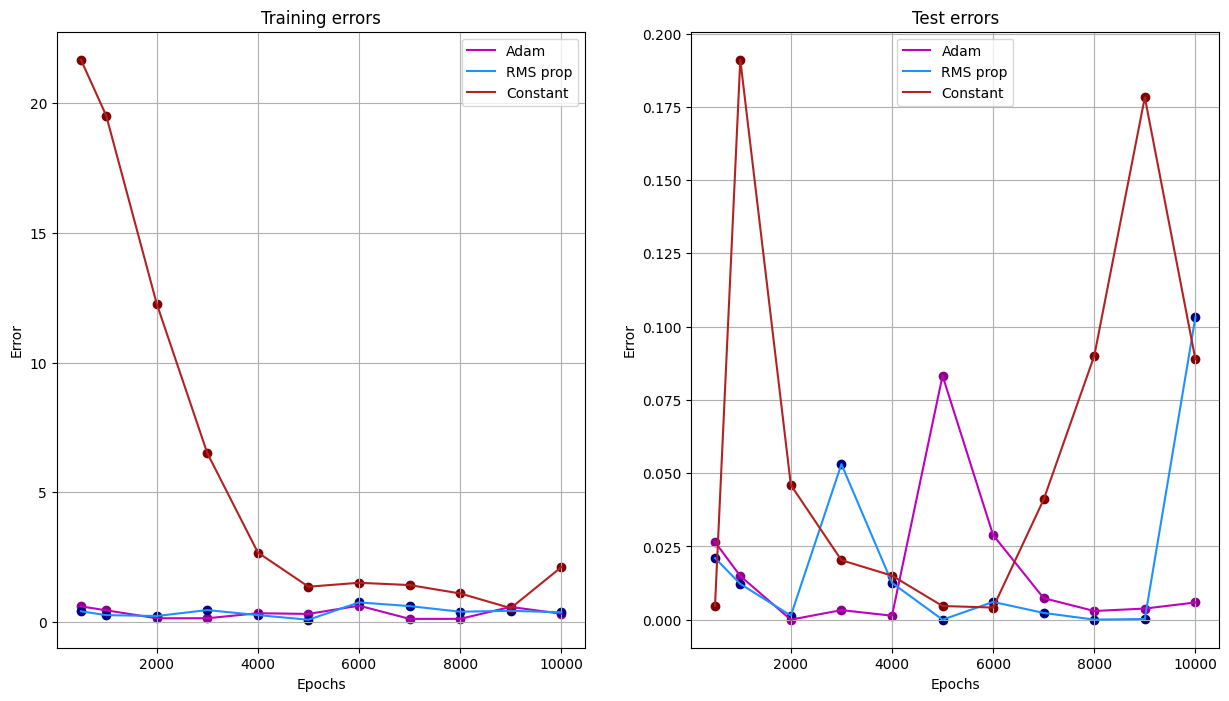

In [14]:
line_epochs_plot(results_epochs_LRELU)